In [16]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
#Extrayendo variable a analizar desde base de datos de Yunque Capital
imae = "'MRD-SR-05-01'" #indice en base de datos de Yunque Capital
conn = pyodbc.connect(driver='{ODBC Driver 17 for SQL Server}', 
                    server='<servername>, 
                    database='<databasename>', 
                    uid='<user>', 
                    pwd='<password>')
c= conn.cursor()
query = "EXEC selectVariable @INDICE =" + str(imae) #Query a la base de datos
df = pd.read_sql(query,conn) #Enviando query a base de datos
df["Fecha"]=pd.to_datetime(df['Fecha'], utc=True) #Cambiando formato de columna de fechas
df

,Fecha,Valor
0,2007-01-01 00:00:00+00:00,93.962898
1,2007-02-01 00:00:00+00:00,96.945709
2,2007-03-01 00:00:00+00:00,101.344367
3,2007-04-01 00:00:00+00:00,95.749101
4,2007-05-01 00:00:00+00:00,103.456807
...,...,...
188,2022-09-01 00:00:00+00:00,189.758258
189,2022-10-01 00:00:00+00:00,199.389531
190,2022-11-01 00:00:00+00:00,210.877491
191,2022-12-01 00:00:00+00:00,219.291437


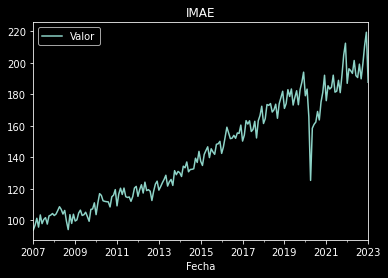

In [17]:
df.set_index("Fecha").plot(title="IMAE")

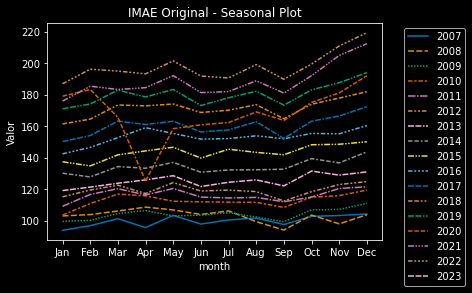

In [18]:
#Separando mes y año para analizar estacionalidad
dfsns = df.set_index("Fecha")
dfsns["year"]=dfsns.index.year
dfsns["month"]=dfsns.index.strftime("%b")
#Creando grafico de parametros necesarios
sns.lineplot(data=dfsns,
            x="month",
            y="Valor",
            hue="year",
            style="year",
            legend="full",
            palette="colorblind")
plt.title("IMAE Original - Seasonal Plot")
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

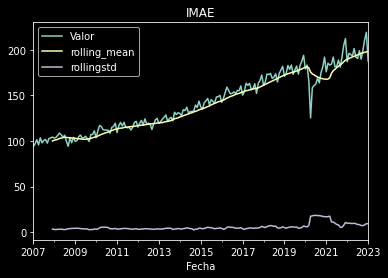

In [19]:
#Agregando ventana movil de media y desviación estándar
df = df.set_index("Fecha")
WINDOW_SIZE =12 
df["rolling_mean"] = df["Valor"].rolling(window=WINDOW_SIZE).mean()
df["rollingstd"] = df["Valor"].rolling(window=WINDOW_SIZE).std()
df.plot(title="IMAE")

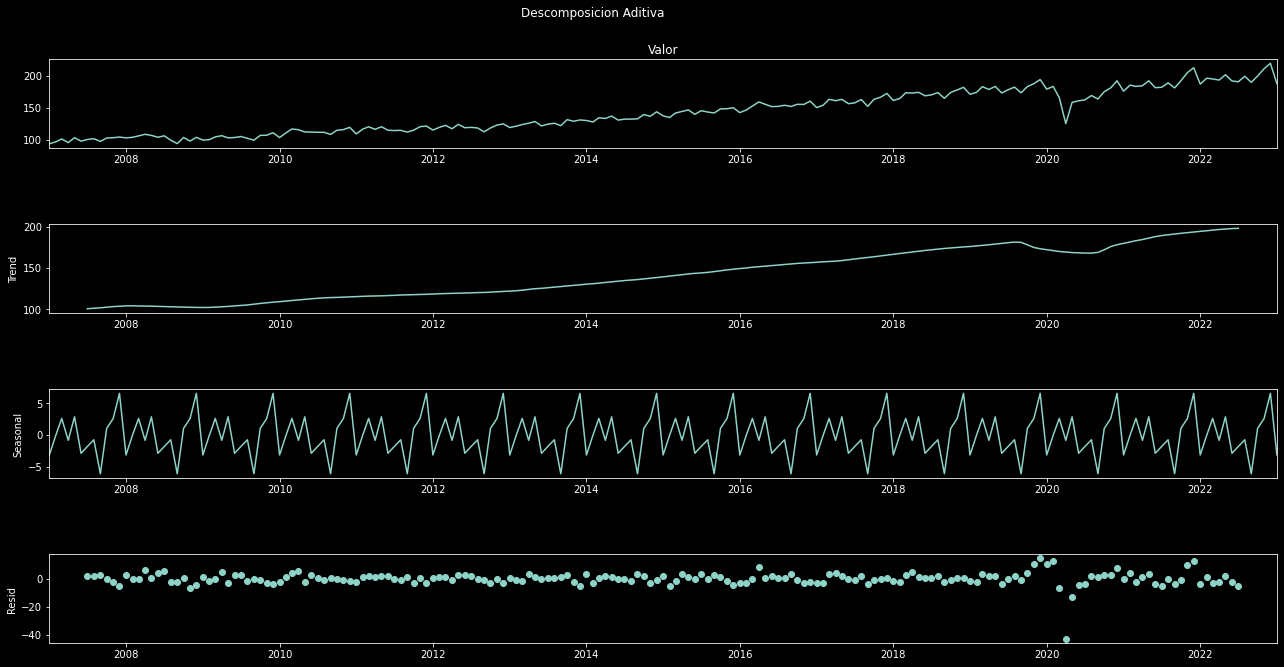

In [20]:
# Create a plot of the decomposition
descompositionResults = seasonal_decompose(df["Valor"],
                                            model = "additive")
(descompositionResults
.plot()
.suptitle("Descomposicion Aditiva"))
# Change the width of the plot
fig = plt.gcf()
fig.set_size_inches(20, 10)
